# Redes neuronales

> Las redes neuronales es un conjunto de perceptrones que reciben una entradad y ntregan una salida. El perceptron es la unidad minima de una red neuronal, y se hace analogía a una neurona, con sus entradas y señales
> El percpetrontine por dentro una función lineal $\mathbf{w}x+\mathbf{b}=y$. La \mathbf{w}, es el peso y el \mathbf{b}, es el bias. Estos se aprenden desde los datos
> Sin embargo, la x, es una única entrada, y los pesos es un vector y el bias también, sin embargo se pueden añadir más entradas, de tal manera que la primera sección resulta en $$y=\mathbf{wx}+\mathbf{b}$$
> Sin embargo, se tiene una función de activación, por lo general es una función no lineal, así que el modelo se describe como
> $$y=f(\mathbf{wx}+\mathbf{b})$$

In [1]:
import torch
import torch.nn as nn
class Perceptron(nn.Module):
    def __init__(self, input_dim):
        """
        Args:
            input_Dim (int), tamaño de las características de entrada
        """
        super(Perceptron,self).__init__()
        self.fc1= nn.Linear(input_dim,1)# unica salida
    def forward(self,x_in):
        """ El paso forward de un perceptron
        Args:
        x_in(torch.Tensor): una entradad como un tensor de pytorch
        x_in.shape debe ser de (batch,num_features)
        Returns:
        el tensor resultante, por lo tanto de debe ser tensor.shape(batch,)
        """
        return torch.sigmoid(self.fc1(x_in)).squeeze(1)

# Algunas funciones de activación

## Sigmoide
La funcion sigmoide es una de las más clásicas en la activación, toma cualquier valor real y haciendo su salida valer entre 0 a 1
$$f(x)=\frac{1}{1+e^{-x}}$$

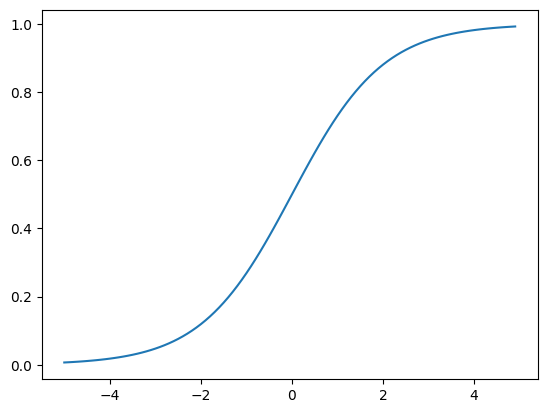

In [2]:
import torch
import matplotlib.pyplot as plt

x=torch.arange(-5,5,0.1)
y=torch.sigmoid(x)
plt.plot(x.numpy(),y.numpy())
plt.show()

# La función del tangente hiperbolico
Se podría decir que es una transformación de la funcións sigmoide. Los valores reales de x se aplastan en la salida a valores entre -1 a 1
$$f(x)=\frac{e^x-e^{-x}}{e^x+e^{-x}}$$

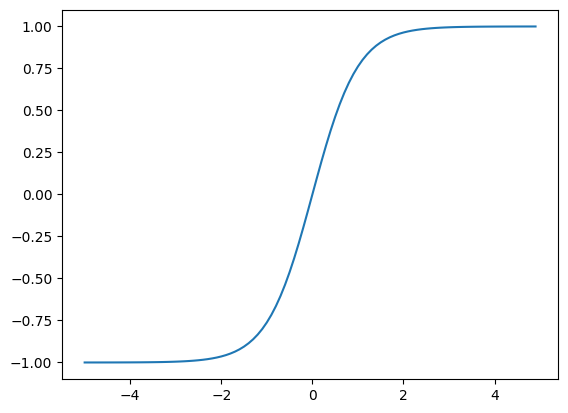

In [3]:
import torch
import matplotlib.pyplot as plt

x=torch.arange(-5,5,0.1)
y=torch.tanh(x)
plt.plot(x.numpy(),y.numpy())
plt.show()

# La función ReLU
Signfiica unidad lineal rectificada. Es la más usada de las funciones de activación, tiene la ventaja de que todos los valores negativos los vuelve 0, 
$$f(x)=\max({0,x})$$

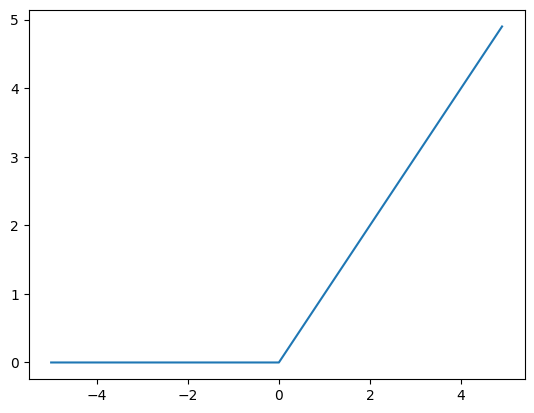

In [4]:
relu=torch.nn.ReLU()

x=torch.arange(-5,5,0.1)
y=relu(x)
plt.plot(x.numpy(),y.numpy())
plt.show()

# PRelu
Debido a que en algunos valores, puedan tomar o hacerse negativos, nunca van a volver a revivir, de esa manera, se crea esta funci´on para mitigar el efectos, hay otra varuante llamada Leaky ReLU y Parametric ReLU, donde la parte del coeficiente leak $a$, es un paramtero aprendido
$$f(x)=\max(x,ax)$$

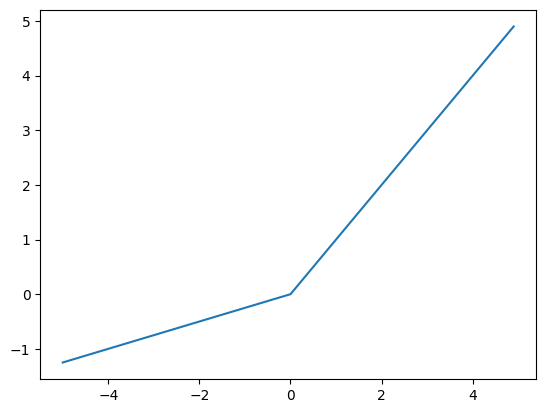

In [5]:
prelu=torch.nn.PReLU(num_parameters=1)
x=torch.arange(-5,5,0.1)
y=prelu(x)
plt.plot(x.numpy(),y.detach().numpy())
plt.show()

# SoftMax
Al iguak que la ufunción sigmoide, limita los valores entre 0 y 1, aunque la diferencia es que divide cada salida por la suma de todas las salidas, de lo cual, da una probabilidad discreta,muy usada ent ransformes
$$ softmax(x)=\frac{e^{x_j}}{\sum^k_{j=1}e^{x_j}}$$

In [6]:
softmax=nn.Softmax(dim=1)
x_input=torch.randn(1,3)
y_output=softmax(x_input)
print(x_input)
print(y_output)
print(torch.sum(y_output,dim=1))

tensor([[-0.1162,  0.3576, -2.0947]])
tensor([[0.3644, 0.5852, 0.0504]])
tensor([1.0000])


# Funciones de peridda 
Las funciones de perdidad o de costo, nos permite defterminar que tan biene sta prediciendo nuestro modelo, en base a la $y$, original y la $\hat{y}$.
Las funciones más comunes son 
## Mean squared error
Para problemas de regresión y en los que los valores de lo predicho y la salida real sean valores continuos, es, muy usada este tipo de función
$$L_{MSE}=\frac{1}{n}\sum^n_{i=1}(y_i-\hat{y_i})^2$$

In [7]:
mse_loss=nn.MSELoss()
outputs=torch.randn(3,5,requires_grad=True)
targets=torch.randn(3,5)
loss=mse_loss(outputs,targets)
print(loss)

tensor(2.1811, grad_fn=<MseLossBackward0>)


# Categorical cross entropy loss
La entropia ctruzada es usa en problmemas multiclase. La saslida y es una vector de n elementos que representan los valores verdaderos, mientras que $\hat{y}$son las preddicciones. Está función compara ambas de la siguiente manera 
$L_{cross\_entropy(y,\hat{y})} =-\Sigma_j y_j \log(\hat{y_j})$
Para usarlo con PyTorch, se deb de entender que esta función asume que hay un vector dado a que una de las funciones con las que mas se complementa, es softmax

In [8]:
ce_loss=nn.CrossEntropyLoss()
outputs=torch.randn(3,5,requires_grad=True)
print(outputs)
targets=torch.tensor([1,0,3],dtype=torch.int64)
print(targets)
loss=ce_loss(outputs,targets)
loss

tensor([[ 0.4042, -1.2143, -1.1932, -0.3475, -0.9114],
        [ 0.6369,  0.3756,  0.5050,  1.8031, -1.9030],
        [ 0.2444,  1.5402, -1.4203, -0.2519, -0.1449]], requires_grad=True)
tensor([1, 0, 3])


tensor(2.1566, grad_fn=<NllLossBackward0>)

# Binary cross entropy loss
como el anterior se usa en multiclase, utilizarlo para solo dos clases, es un cañonazo, y por lo tanto, se prefiere esta función
Y vamos a hacerlo con la salida de una función de acitvación sigmoide, de lo cuál, resulta primeramente un vector de 0 y 1's, 

In [9]:
bce_loss=nn.BCELoss()
sigmoid=nn.Sigmoid()
probabilities=sigmoid(torch.randn(4,1,requires_grad=True))
targets= torch.tensor([1,0,1,0],dtype=torch.float32).view(4,1)
print(targets)
loss=bce_loss(probabilities,targets)
print(probabilities)
print(loss)


tensor([[1.],
        [0.],
        [1.],
        [0.]])
tensor([[0.3727],
        [0.1454],
        [0.6750],
        [0.3640]], grad_fn=<SigmoidBackward0>)
tensor(0.4974, grad_fn=<BinaryCrossEntropyBackward0>)


# Get Data Function


In [10]:
LEFT_CENTER = (3, 3)
RIGHT_CENTER = (3, -2)
import numpy as np
def get_toy_data(batch_size, left_center=LEFT_CENTER, right_center=RIGHT_CENTER):
    x_data = []
    y_targets = np.zeros(batch_size)
    for batch_i in range(batch_size):
        if np.random.random() > 0.5:
            x_data.append(np.random.normal(loc=left_center))
        else:
            x_data.append(np.random.normal(loc=right_center))
            y_targets[batch_i] = 1
    return torch.tensor(x_data, dtype=torch.float32), torch.tensor(y_targets, dtype=torch.float32)

# Instanciando el optimizador adam

In [11]:
import torch.nn as nn
import torch.optim as optim
input_dim=2 #Son dos distribuciones de probabilidad
lr=0.001
perceptron= Perceptron(input_dim=input_dim)
bce_loss=nn.BCELoss()
optimizer=optim.Adam(params=perceptron.parameters(),lr=lr)

#Loop de aprendizaje supervisado

In [12]:
# cada epoca e sun paso completo sobre los datos de entrenamiento
n_epochs=10
n_batches=10
batch_size=100
for epoch_i in range(n_epochs):
    #El loop interno es sobre los batches
    for batch_i in range(n_batches):
        #adquiero lo datos
        x_data,y_target=get_toy_data(batch_size)
        # limpio los gradientes
        perceptron.zero_grad()
        # Calcular el paso hacia adelante para el modelo
        y_pred = perceptron.forward(x_data)
        # Se calucla la perdidad
        loss=bce_loss(y_pred,y_target)
        # paso 4, propaga la señal de perdidad a todas las neuronas
        loss.backward()
        # paso 5, activa la optimización paaea cada parametro
        optimizer.step()

C:\Users\lepop\AppData\Local\Temp\ipykernel_37484\503997852.py:13: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\torch\csrc\utils\tensor_new.cpp:256.)
  return torch.tensor(x_data, dtype=torch.float32), torch.tensor(y_targets, dtype=torch.float32)


# Ejemplo practio: Clasificando sentimientos de rewvies un restaurante 

In [13]:
import collections
import numpy as np
import pandas as pd
import re


from argparse import Namespace

In [14]:
args = Namespace(
    raw_train_dataset_csv="data/yelp/raw_train.csv", #Lugar donde esta el datasets 
    raw_test_dataset_csv="data/yelp/raw_test.csv",
    proportion_subset_of_train=0.1, #Proporcon de subset de train 
    train_proportion=0.7, #70 de entrenamineto 
    val_proportion=0.15, # 15 de validacion
    test_proportion=0.15, # 15 de test
    output_munged_csv="data/yelp/reviews_with_splits_lite.csv", # no se
    seed=1337 # semilla
)

In [15]:
train_reviews=pd.read_csv(args.raw_train_dataset_csv,header=None,names=["rating","review"])
train_reviews # No esta el ddataset
# making the subset equal across the review classes
by_rating = collections.defaultdict(list)
for _, row in train_reviews.iterrows():
    by_rating[row.rating].append(row.to_dict())
    
review_subset = []

for _, item_list in sorted(by_rating.items()):

    n_total = len(item_list)
    n_subset = int(args.proportion_subset_of_train * n_total)
    review_subset.extend(item_list[:n_subset])

review_subset = pd.DataFrame(review_subset)

In [16]:
# Splitting the subset by rating to create our new train, val, and test splits
by_rating = collections.defaultdict(list)
for _, row in review_subset.iterrows():
    by_rating[row.rating].append(row.to_dict())
    
final_list = []
np.random.seed(args.seed)

for _, item_list in sorted(by_rating.items()):

    np.random.shuffle(item_list)
    
    n_total = len(item_list)
    n_train = int(args.train_proportion * n_total)
    n_val = int(args.val_proportion * n_total)
    n_test = int(args.test_proportion * n_total)
    
    # Give data point a split attribute
    for item in item_list[:n_train]:
        item['split'] = 'train'
    
    for item in item_list[n_train:n_train+n_val]:
        item['split'] = 'val'
        
    for item in item_list[n_train+n_val:n_train+n_val+n_test]:
        item['split'] = 'test'

    # Add to final list
    final_list.extend(item_list)

    ##Codigo de ejemplo que en teoria se aplicaria al solo dividir

In [ ]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r"([.,!?])", r" \1 ", text)
    text = re.sub(r"[^a-zA-Z.,!?]+", r" ", text)
    return text
    
#final_reviews.review = final_reviews.review.apply(preprocess_text)
#Solo hace el preprocesamiento éro no tiene codigo entonces usare solo el lite

# Nota importante.
> En esta sección del libro, intenta enseñarte como separar o dividr un conjunto de datos, algo que tanto lo puedes hacer manual o con scikit learn, sin embargo, el problema es que no está el raw data y solo está y existe la salida, por lo que esta tarea se dejara así, apartir de los siguiente que se escriba, si existe su respectivo conjunto de datos}
## Transformación
> Después de haberse transformado el conjunto de datos, y haberse divido el conjunto de datos en un csv, se utiliza ese para poder cargarlo a pytorch

In [18]:
from torch.utils.data import Dataset,DataLoader
class ReviewDataset(Dataset):
    # Se hereda la clase Dataset
    def __init__(self,review_df,vectorizer):
        """
        Args:
            review_df(pandas.DataFrame): El conjunto de datos
            vectorizer(ReviewVectorizer): vectorizer instacinado desde el conjunto de datos
        """
        self.review_df = review_df
        self._vectorizer = vectorizer
        self.train_df= self.review_df[self.review_df.split=="train"]
        self.train_size=len(self.train_df)

        self.val_df= self.review_df[self.review_df.split=="val"]
        self.val_size=len(self.val_df)

        self.test_df= self.review_df[self.review_df.split=="test"]
        self.test_size=len(self.test_df)

        self._lookup_dic={'train':(self.train_df,self.train_size),
                         'val':(self.val_df,self.val_size),
                         'test':(self.test_df,self.test_size),
                         }
        self.set_split("train")
    @classmethod
    def load_dataset_and_make_vectorizer(cls,review_cls):
        """
        carga el dataset y hacer un nuevo vectorizador desde cero
        args:
                review_cvs(str): ubicacion del dataset
        Returns:
            una instancia de ReviewDataset
        """
        review_df= pd.read_csv(review_cls)
        return cls(review_df,ReviewVectorizer.from_dataframe(review_df))
    def get_vectorizer(self):
        """retorna el vectorizador"""
        return self._vectorizer
    def set_split(self,split="train"):
        """
        Selecciona la division en el conjunto de datos usando una columna en el dataframe
        args:
        split(str):  uno de "train","val","test"
        """
        self._target_split=split
        self._target_df,self._target_size=self._lookup_dic[split]
    def __len__(self):
        return self._target_size
    def __getitem__(self,index):
        """
        El punto primario de entrada como metodo para PyTorch en lso conjuntos de datos
        Args:
        index(int): Es el inice del dato
        Returns:
            Diccionario de las caracterizitcads de los puntos de datos y labels
        """
        row=self._target_df.iloc[index]
        review_vector=self._vectorizer.vectorize(row.review)
        rating_index=self._vectorizer.rating_vocab.lookup_token(row.rating)
        return {'x_data':review_vector,
               'y_data':rating_index}
    def get_num_batches(self,batch_size):
        """
        Dado un tamaño de batch , retorna el numero de batches del conjunto de datos
        Args:
            batch_size(int)
        Returns:
            Numero de batches en el conjuntos
        """
        return len(self)//batch_size

# Clases faltantes
> Hay tres clases faltantes en nuestro código, primero, la del vocabularizer, que permitirá de un texto preprocesado, convertirlo en un vector mini bathch. el vectoirzador que permite convertirlo a entero y el dataloader.
> Cada una será usada o se usó en nuestra clase dataset.
> El primero importante es el vocabularizer, que separa cada texto por tokens en espacios en blanco y los convertira de forma númerica

In [19]:
class Vocabulary(object):
    """ Clase a procesar texto y extrar el vocabulario para mappear"""
    def __init__(self,token_to_idx=None,add_unk=True,unk_token="<UNK>"):
        """Args:
            token_to_idx (dict): un mapa pre existen de toknes a indices
            add_unk(bool): un bandera que indica si se añade el token UNK de desconocido
            unk_token(str): el token UNK se añade a el vocabulario
            """
        if token_to_idx is None:
            token_to_idx={}
        self._token_to_idx=token_to_idx
        self._idx_to_token={idx: token
                           for token,idx in self._token_to_idx.items()}
        self._add_unk=add_unk
        self._unk_token=unk_token
        self.unk_index=-1
        if add_unk:
            self.unk_index=self.add_token(unk_token)
    def to_serializable(self):
        """ Retorna un diccionario que puede ser serializado """
        return {"token_to_idx":self._token_to_idx,
               "add_unk":self._add_unk,
               "unk_token":self._unk_token}
    @classmethod
    def from_serializable(cls,contents):
        """instancia el bocabulario desde un diccionario serializado"""
        return cls(**contents)
    def add_token(self,token):
        """
        Actualiza los mapeos de diccionarrios basados en los tokens
        Args:
            token (str): el item a añadir en el vocabulario
        Returns:
            index(int) : el entero correspondiente al token
        """
        if token in self._token_to_idx:
            index=self._token_to_idx[token]
        else:
            index=len(self._token_to_idx)
            self._token_to_idx[token]=index
            self._idx_to_token[index]=token
        return index
    def lookup_token(self,token):
        """ Obtiene el indice asociado con el tokenn de UNK token si el token no está presente,
        Args:
            token (str): el token a observar
        returns :
            index (int) el indices correspondiente al token
        Notes:
               `unk_index` necesita ser entero positivo (habiendo sido añadido al vocabulario) para la funcionalidad desconocidad
               """
        if self._add_unk:
            return self._token_to_idx.get(token,self.unk_index)
        else:
            return self._token_to_idx[token]
    def lookup_index(self,index):
        """ Obtiene el token asociado al indice
        Args:
            index (int): el indice a observar
        returns :
            token (str) el token correspondiendte al indices
        Raises:
            KeyError: si el indice no está en el vocabulario
        """
        if index not in self._idx_to_token:
            raise KeyError("El indice (%d)no está en el vocabulario" % index)
        return self._idx_to_token[index]
    def __str__(self):
        return "<Vocabulary(size=%d)>" % len(self)
    def __len__(self):#Refleja la longitudad del vocabulario
        return len(self._token_to_idx)

## Clase de vectorizer
> Ya que tenemos de la forma más general nuestro vocabulario, podemos proceder a hacer nuestra clas de vectorizer. Esta recibe un string que es cada review y lo convierte a su forma de vector. Cadad vector debe de tener el mismo tamaño, que sería la longitud del vocabulario.
> Sin embargo, se dará cuenta que al usar el one hot encoding o la forma de bernoulli, se hace una matriz sparse, con muchos ceros de por medio

In [20]:
from collections import Counter
import string
class ReviewVectorizer(object):
    """ La clase vectorizer de las cuales, suss coordenadas son las del vocabulario"""
    def __init__(self,review_vocab,rating_vocab):
        """
        Args:
            review_vocab(Vocabulary): mapea las palabras a los enteros
            rating_vocab (Vocabulary); Mapea las etiquetas de las clases a enteros
            """
        self.review_vocab= review_vocab
        self.rating_vocab=rating_vocab
    def vectorize(self,review):
        """ 
        Crea un vecctor colapsado para la reseña
        Args:
            review(str) : una reseña
        Returns:
            one_hot (np.ndarray): la codificacion colapsadad 
        """
        one_hot = np.zeros(len(self.review_vocab),dtype=np.float32)
        for token in review.split(" "):
            if token not in string.punctuation:
                one_hot[self.review_vocab.lookup_token(token)]=1
        return one_hot
    @classmethod
    def from_dataframe(cls,review_df,cutoff=25):
        """
        Instancia el vectorizer desde el conjunto de datos del dataframe

        Args:
            review_df (pandas.Dataframe): el conjunto de datos de reseñas
            cuttof(int): el parametro para el filtro de basado en frecuencia
        Returns
        una instacia del ReviewVectorizer
        """
        review_vocab=Vocabulary(add_unk=True)
        rating_vocab=Vocabulary(add_unk=False)
        
        #Añadir ratings
        for rating in sorted(set(review_df.rating)):
            rating_vocab.add_token(rating)
        #Añada la palabras top if count>providad count
        words_counts=Counter()
        for review in review_df.review:
            for word in review.split(" "):
                if word not in string.punctuation:
                    words_counts[word]+=1
        for word,count in words_counts.items():
            if count>cutoff:
                review_vocab.add_token(word)
        return cls(review_vocab,rating_vocab)
    @classmethod 
    def from_serializable(cls,contents):
        """
        Instancia una ReviewCectorizer desde un diccionario serializavle
        Args:
                contents(dicT): el diccionario serializable
        Returns:
            Una instancia de ReviewVectorizer class
        """
        review_vocab=Vocabulary.from_serializable(contents["review_vocab"])
        rating_vocab=Vocabulary.from_serializable(contents["rating_vocab"])
        return cls(review_vocab,rating_vocab)
    def to_serializable(self):
        """Crea un diccionario seralizable para el chace
        Returns:
            contents(ditc): el diccionario serializable
        """
        return {"review_vocab": self.review_vocab.to_serializable(),
               "rating_vocab": self.rating_vocab.to_serializable()}

## Generar el dataLoader, 
> Aqui ya unimmos todo para hacer la carga del dataset a nuestro modelo, se utiliza la funcion generate_batches, que permite separar entre cpu y gpu

In [21]:
def generate_batches(dataset,batch_size,shuffle=True,
                     drop_last=True,device="cpu"):
    """Una funcion generation la que wrapea ek dataloader de pytorxh. SE asegurarar de que cada tesnor este en un unico dispositivo
    """
    dataloader=DataLoader(dataset=dataset,batch_size=batch_size,shuffle=shuffle,drop_last=drop_last)
    for data_dict in dataloader:
        out_data_dict = {}
        for name, tensor in data_dict.items():
            out_data_dict[name] = data_dict[name].to(device)
        yield out_data_dict

# EL clasificador de reseñas, 
Se hace un uso parecido a la clase del inicio, pero con unas modificiaciones

In [22]:
import torch.nn as nn
import torch.nn.functional as F
class ReviewClassifier(nn.Module):
    """Un simple perceptron"""
    def __init__(self, num_features):
        """
        Args:
            num_Features (int), tamaño de las características de entrada
        """
        super(ReviewClassifier,self).__init__()
        self.fc1= nn.Linear(num_features,out_features=1)# unica salida
    def forward(self,x_in,apply_sigmoid=True):
        """ El paso forward de un perceptron
        Args:
        x_in(torch.Tensor): una entradad como un tensor de pytorch
        x_in.shape debe ser de (batch,num_features)
        Returns:
        el tensor resultante, por lo tanto de debe ser tensor.shape(batch,)
        """
        y_out=self.fc1(x_in).squeeze()
        if apply_sigmoid:
            y_out= F.sigmoid(y_out)
        return y_out

In [23]:
from argparse import Namespace
args=Namespace(
    cuda=True,
    frequency_cutoff=25,
    model_state_file="model.pth",
    review_csv="data/yelp/reviews_with_splits_lite.csv",
    save_dir="model_storage/ch3/yelp",
    vectorizer_file="vectorizer.json",
    #training hyperparametrs
    batch_size=128,
    early_stopping_criteria=5,
    learning_rate=0.001,
    num_epochs=100,
    seed=1337)

## Instanciar el conjunto de datos, modelos, loss, optimizer y el estado de entrenamiento

In [24]:
import torch.optim as optim
def make_train_state(args):
    return { "epoch_index":0,
             "train_loss": [],
             "train_acc":[],
             "val_loss":[],
             "val_acc":[],
             "test_loss":-1,
             "test_acc":-1}
def compute_accuracy(y_pred,y_target):
    y_target=y_target.cpu()
    y_pred_indices=(torch.sigmoid(y_pred)>0.5).cpu().long()
    n_correct=torch.eq(y_pred_indices,y_target).sum().item()
    return n_correct/len(y_pred_indices)*100

In [25]:
train_state=make_train_state(args)
if not torch.cuda.is_available():
    args.cuda=False
args.device= torch.device("cuda" if args.cuda else "cpu")
#Dataset and vectorizer
dataset=ReviewDataset.load_dataset_and_make_vectorizer(args.review_csv)
vectorizer=dataset.get_vectorizer()
#Model
classifier = ReviewClassifier(num_features=len(vectorizer.review_vocab))
classifier = classifier.to(args.device)

#Loss and optimizer
loss_func= nn.BCEWithLogitsLoss()
optimizer=optim.Adam(classifier.parameters(),lr=args.learning_rate)

### El loop de entrenamiento, las optimizaciones

In [26]:
for epoch_index in range(args.num_epochs):
    train_state['epoch_index']=epoch_index
    # Itera sobre nuestro dataset
    #Configura: el generador de batch, la perdidad, el accuracy a 0 y el conjunto de entrenamiento a activo
    dataset.set_split("train")
    batch_generator=generate_batches(dataset,batch_size=args.batch_size,device=args.device)
    running_loss=0.0
    running_acc=0.0
    classifier.train()
    for batch_index,batch_dict in enumerate(batch_generator):
        
        # La rutina de entrenamiento se conforma de 5 pasos

        #paso 1, los gradientes en cero
        optimizer.zero_grad()
        #Paso . calcula la salida
        y_pred=classifier(x_in=batch_dict["x_data"].float())
        #paso 3, calcula la perdidad
        loss=loss_func(y_pred,batch_dict["y_data"].float())
        loss_batch=loss.item()
        running_loss+=(loss_batch-running_loss)/(batch_index+1)
        #paso 4, usa la perdidad para producir el gradiente
        loss.backward()
        #Paso 5, usa el otpimizar para que tomo el paso gradiente
        optimizer.step()

        ##Calcula el accuracy
        acc_batch=compute_accuracy(y_pred,batch_dict["y_data"])
        running_acc+=(acc_batch-running_acc)/(batch_index+1)
    train_state["train_loss"].append(running_loss)
    train_state["train_acc"].append(running_acc)

    #Iterar sobre el dataset de validacion
    #Configura, el generator de batch, la perdiddad, el accuracy a 0 y modo eval
    dataset.set_split("val")
    batch_generator=generate_batches(dataset,batch_size=args.batch_size,device=args.device)
    running_loss=0.0
    running_acc=0.0
    classifier.eval()
    #Empieza la evaluacion
    for batch_index,batch_dict in enumerate(batch_generator):
        # Paso 1: calcula la salida
        y_pred=classifier(x_in=batch_dict["x_data"].float())
        # paso 2, calcula la salida
        loss = loss_func(y_pred,batch_dict['y_data'].float())
        loss_batch = loss.item()
        running_loss += (loss_batch-running_loss)/(batch_index+1)
        #paso 3, calcula el accuracy
        acc_batch= compute_accuracy(y_pred,batch_dict['y_data'])
        running_acc+=(acc_batch-running_acc)/(batch_index+1)
    train_state["val_loss"].append(running_loss)
    train_state["val_acc"].append(running_acc)

In [28]:
dataset.set_split("test")
batch_generator=generate_batches(dataset,batch_size=args.batch_size,device=args.device)
running_loss=0.
running_acc=0.
classifier.eval()
print("comienza la evaluacion")
for batch_index,batch_dict in enumerate(batch_generator):
    print("batch: ",batch_index)
    #Compute the output
    y_pred=classifier(x_in=batch_dict["x_data"].float())
    # calcula la perdidad
    loss = loss_func(y_pred,batch_dict["y_data"].float())
    loss_batch= loss.item()
    running_loss += (loss_batch-running_loss)/(batch_index+1)
    #Calcula el accuracy 
    acc_batch= compute_accuracy(y_pred,batch_dict["y_data"])
    running_acc+=(acc_batch-running_acc)/(batch_index+1)
train_state["test_loss"]= running_loss
train_state["test_acc"] = running_acc

comienza la evaluacion
batch:  0
batch:  1
batch:  2
batch:  3
batch:  4
batch:  5
batch:  6
batch:  7
batch:  8
batch:  9
batch:  10
batch:  11
batch:  12
batch:  13
batch:  14
batch:  15
batch:  16
batch:  17
batch:  18
batch:  19
batch:  20
batch:  21
batch:  22
batch:  23
batch:  24
batch:  25
batch:  26
batch:  27
batch:  28
batch:  29
batch:  30
batch:  31
batch:  32
batch:  33
batch:  34
batch:  35
batch:  36
batch:  37
batch:  38
batch:  39
batch:  40
batch:  41
batch:  42
batch:  43
batch:  44
batch:  45
batch:  46
batch:  47
batch:  48
batch:  49
batch:  50
batch:  51
batch:  52
batch:  53
batch:  54
batch:  55
batch:  56
batch:  57
batch:  58
batch:  59
batch:  60
batch:  61
batch:  62
batch:  63
batch:  64


In [38]:
print(train_state["test_acc"])

66.22596153846155


## Inferencia

In [35]:
def predict_ratting(review,classifier,vectorizer, decision_threshold=0.5):
    """
    predice el rate de una reseña
    args:
        review(str): el texto de la reseña
        classifier(ReviewClassifier): el modelo entrenado 
        vectorizer( Review_vectorizer): el vectorizer correspondiente
        decision_threshold(floAT): EL LIMITE NUMERICO POR el que separa las clases
    """
    review= preprocess_text(review) #Preprocesa el texto
    vectorized_review=torch.tensor(vectorizer.vectorize(review)).to(args.device) #vectoriza el texto y lo convierte a tensor
    result=classifier(vectorized_review.view(1,-1))# lo pasa al clasificador convirtiendo el vector a las dimensiones correctas del clasificador
    probability_value= F.sigmoid(result).item()# valores de probabildiad acorde a la sigmoide
    index=1 # positivo
    if probability_value<decision_threshold:
        index=0 # negativo
    return vectorizer.rating_vocab.lookup_index(index)

In [36]:
test_review= "this is a pretty awesome book"
prediction= predict_ratting(test_review,classifier,vectorizer)
print(f"{test_review} -> {prediction}")

this is a pretty awesome book -> positive


# Inspeccionando los pesos de los modelos

In [46]:
# Ordenar los pesos
fc1_weights=classifier.fc1.weight.detach().cpu()[0]
_,indices= torch.sort(fc1_weights,dim=0,descending=True)
indices= indices.numpy().tolist()
print("Las 20 palabaras más influyetes")
print("Palabras positivas")
for i in range(20):
    print(vectorizer.review_vocab.lookup_index(indices[i])) 
print("\n\nLas 20 palabaras más influyetes")
print("Palabras negativas")
indices.reverse()
for i in range(20):
    print(vectorizer.review_vocab.lookup_index(indices[i]))


Las 20 palabaras más influyetes
Palabras positivas
pleasantly
delicious
chinatown
fantastic
moist
deliciousness
ngreat
nthank
yummy
vegas
hooked
heavenly
delightful
lawn
notch
unlike
yum
superb
intimate
hiking


Las 20 palabaras más influyetes
Palabras negativas
worst
mediocre
meh
horrible
bland
slowest
terrible
rude
tasteless
awful
idiots
disappointment
cancelled
disappointing
downhill
sucked
redeeming
yelled
unprofessional
unacceptable
